In [1]:
# 2. Pozo cuántico asimétrico

In [2]:
# a) Está en el PDF adjunto

In [3]:
#b) Está en el PDF adjunto, el desarrollo, aquí yo solo voy a poner código.

#Solo voy a mencionar rápido que así como tenemos la integral no da lo que debe, debe tener el factor como L/2 no 2/L
#o yo hice mal la integral, puede ser.
#pero gracias al Hint que nos dan de como debe ser el ground state se ve que si debe ser así.
#porque si no me da un 9. y algo en vez del 5.84 que debe dar.

from math import pi 
L = 5e-10 #ancho del pozo
hbar = 1.0546e-34 #constante de Planck
M = 9.1094e-31 #masa del electrón
q = 1.6022e-19 #carga del electrón
a = 10*q #a del potencial

def H(m,n):
	H = 0
	H_OG = 0
	if m == n:
		H_OG =(hbar*pi*n)**2/(2*M*L**2) + a/2
		H = ((hbar*pi*n)**2)/(8*M) +(a*L**2)/8
	if (m+n)%2 == 1:
		H_OG = -(2*L/pi)**2 * m*n/(m**2 - n**2)**2 * ((2*a)/L**2 )
		H = -(2*L/pi)**2 * m*n/(m**2 - n**2)**2 * a/2
	return H , H_OG
m = 0
n = 0
Hquesirve, Hquenosirve = H(m,n)
print('H =',Hquesirve)
print('H_OG = ',Hquenosirve)

H = 5.006875e-38
H_OG =  8.011e-19


In [4]:
# c)
from numpy import empty
from numpy.linalg import eigh
def Hp(m,n):
	H = 0
	if m == n:
		H+= hbar**2/8/M*pi**2*n**2
	def I(m,n):
		if m == n:
			return L**2/4
		elif (m+n)%2 == 1:
			return -(2*L/pi)**2* m*n/(m**2-n**2)**2
		else:
			return 0
	H += a/2*I(m,n)
	return H

N = 10
A = empty((N,N),float)
#Llenamos la matriz
for i in range(N):
	for j in range(N):
		A[i,j] = Hp(i+1,j+1)

#Usando eigh nos va a escupir autovalores y autovectores, asi que debemos diferenciar uno del otro
Xvalues, Xvectores = eigh(A)

print(Xvalues[:10])


[5.84447929e-38 1.11966873e-37 1.86890511e-37 2.91851616e-37
 4.27151197e-37 5.92686465e-37 7.88403483e-37 1.01428324e-36
 1.27030329e-36 1.55774796e-36]


In [5]:
# d)
N = 100
A = empty((N,N),float)
#Llenamos la matriz
for i in range(N):
	for j in range(N):
		A[i,j] = Hp(i+1,j+1)
Xvalues, Xvectores = eigh(A)
print(Xvalues[:10])


[5.84447889e-38 1.11966859e-37 1.86890493e-37 2.91851528e-37
 4.27151106e-37 5.92685938e-37 7.88402964e-37 1.01427693e-36
 1.27029495e-36 1.55645000e-36]


In [6]:
sum(Xvectores[:,1]*2)

-1.6713146830882781

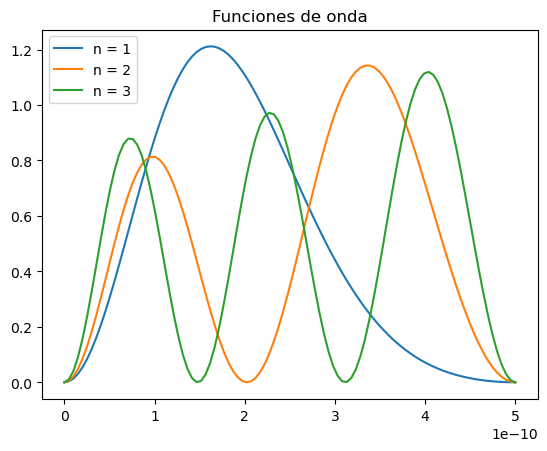

In [7]:
# e)
from pylab import plot,legend,linspace,sin,arange, show, title
#Definimos la función de onda

def FO(x,m=1):
	#abr pa, saca una infinita suma de senos
	n = arange(1,N+1)
	#creo que es obvio que es Phi
	s = sum(Xvectores[:,m]*sin(pi*n*x/L)) 
	return s**2 #Si

x = linspace(0,L,100)

for i in range(3):
	#generamos las y por asi decirlo
	Phi_x = [FO(xi,m=i) for xi in x]
	#nah amigo, la suma de la suma de la...
	#Solo es plotear dominio con su respectivo y
	plot(x,Phi_x,label='n = '+str(i+1))
title('Funciones de onda')
legend()
show()